<a href="https://colab.research.google.com/github/Erika2397/Bootcamp_Alura_Data_Science/blob/main/An%C3%A1lise_e_Previs%C3%A3o_de_S%C3%A9ries_Temporais_(Module_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Série Temporal**

## **O que são séries temporais?**



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando o arquivo do github
url = 'https://github.com/alura-cursos/serie_temporal_bootcamp/raw/main/tuberculose_ano_mes_diagnostico.csv'
dados = pd.read_csv(url, encoding = 'ISO-8859-1', sep=';', skiprows= 3, skipfooter= 16, engine='python')
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
# Olhando para os últimos dados
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


## **Preparando os dados**

In [4]:
# Tirando a coluna total
dados.drop('Total', axis=1, inplace=True)
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


In [5]:
# Tirando a linha total
dados.drop(19, axis=0, inplace=True)
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220


In [6]:
# Usando o parámetro melt para derreter a coluna ano
dados_serie_temporal = dados.melt(id_vars='Ano Diagnóstico', value_name='Casos', var_name='Mês')
dados_serie_temporal

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [7]:
# Criando a coluna data
dados_serie_temporal['Data'] = dados_serie_temporal['Ano Diagnóstico']+'-'+dados_serie_temporal['Mês']
dados_serie_temporal

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


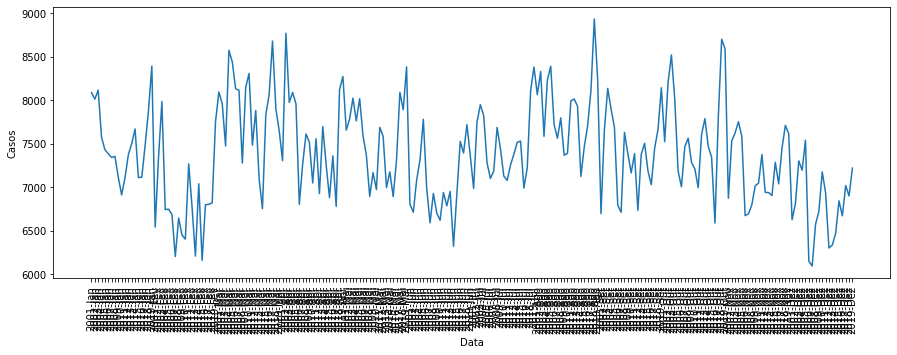

In [8]:
# Plotando o gráfico
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal)
plt.xticks(rotation=90)
plt.show()

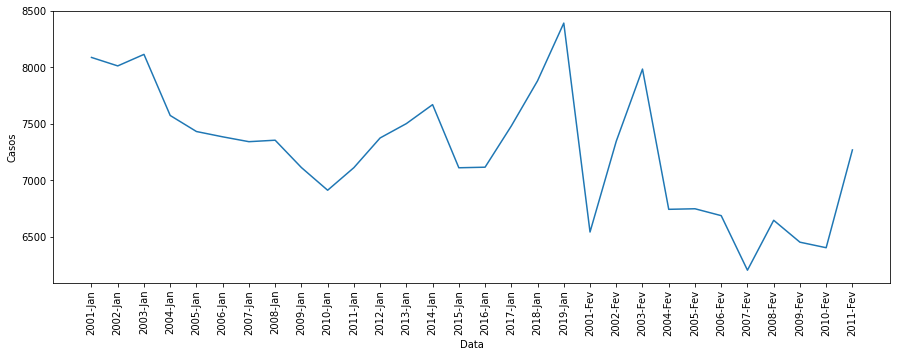

In [9]:
# Plotando o gráfico com os 30 primeiros (zoom)
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[:30]) # As datas não estão organizadas
plt.xticks(rotation=90)
plt.show()

In [10]:
# Olhando para os tipos de dados do dataframe
dados_serie_temporal.dtypes

Ano Diagnóstico    object
Mês                object
Casos               int64
Data               object
dtype: object

# **Manipulação de datas**

## **Manipulando dados em formatação Data**

In [11]:
'''
dados_serie_temporal['Data'] = pd.to_datetime(dados_serie_temporal['Data'])
dados_serie_temporal.dtypes

Isso aqui dá um erro porque o datetime não reconheceu a abreviação do mês fevereiro porque está em português. 
'''

"\ndados_serie_temporal['Data'] = pd.to_datetime(dados_serie_temporal['Data'])\ndados_serie_temporal.dtypes\n\nIsso aqui dá um erro porque o datetime não reconheceu a abreviação do mês fevereiro porque está em português. \n"

In [12]:
dados_serie_temporal['Mês'].unique()

array(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set',
       'Out', 'Nov', 'Dez'], dtype=object)

In [13]:
# Criando o dicionário para traduzir os meses
meses_port_ing = {
    'Jan': 'Jan', 
    'Fev': 'Feb', 
    'Mar': 'Mar', 
    'Abr': 'Apr', 
    'Mai': 'May', 
    'Jun': 'Jun', 
    'Jul': 'Jul', 
    'Ago': 'Aug', 
    'Set': 'Sep',
    'Out': 'Oct', 
    'Nov': 'Nov', 
    'Dez': 'Dec',
}

dados_serie_temporal['Mês'] = dados_serie_temporal['Mês'].map(meses_port_ing)
dados_serie_temporal.sample(5)

,Ano Diagnóstico,Mês,Casos,Data
83,2008,May,6895,2008-Mai
202,2013,Nov,6939,2013-Nov
69,2013,Apr,7696,2013-Abr
92,2017,May,8091,2017-Mai
205,2016,Nov,7039,2016-Nov


In [14]:
# Atualizando Data
dados_serie_temporal['Data'] = dados_serie_temporal['Ano Diagnóstico']+'-'+dados_serie_temporal['Mês']
dados_serie_temporal

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [15]:
# Levando para datetime
dados_serie_temporal['Data'] = pd.to_datetime(dados_serie_temporal['Data'])
dados_serie_temporal.dtypes

Ano Diagnóstico            object
Mês                        object
Casos                       int64
Data               datetime64[ns]
dtype: object

In [16]:
# Verificando os dados
dados_serie_temporal

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [17]:
# Trabalhando só com as colunas Data e Casos
dados_serie_temporal = dados_serie_temporal[['Casos', 'Data']]
dados_serie_temporal

,Casos,Data
0,8088,2001-01-01
1,8013,2002-01-01
2,8115,2003-01-01
3,7574,2004-01-01
4,7432,2005-01-01
...,...,...
223,6844,2015-12-01
224,6672,2016-12-01
225,7020,2017-12-01
226,6900,2018-12-01


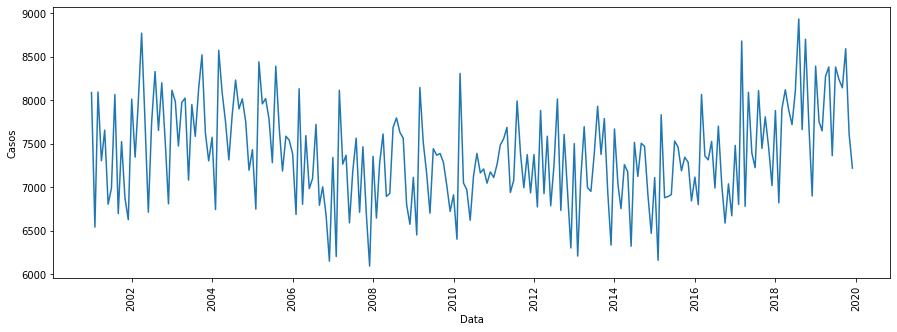

In [18]:
# Plotando o gráfico
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal)
plt.xticks(rotation=90)
plt.show()

# **Iniciando a análise de Série Temporal**

## **TendÊncias e médias móveis**

In [19]:
# Ordenando os dados
dados_serie_temporal.sort_values(by=['Data'], inplace=True)
dados_serie_temporal.reset_index(drop=True, inplace=True)
dados_serie_temporal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Casos,Data
0,8088,2001-01-01
1,6542,2001-02-01
2,8095,2001-03-01
3,7305,2001-04-01
4,7656,2001-05-01
...,...,...
223,8239,2019-08-01
224,8143,2019-09-01
225,8592,2019-10-01
226,7615,2019-11-01


In [20]:
# Usando média móvel rolling (pesquisar)
dados_serie_temporal['Media_Movel_3'] = dados_serie_temporal['Casos'].rolling(3).mean()
dados_serie_temporal.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Casos,Data,Media_Movel_3
0,8088,2001-01-01,NaN
1,6542,2001-02-01,NaN
2,8095,2001-03-01,7575.000000
3,7305,2001-04-01,7314.000000
4,7656,2001-05-01,7685.333333


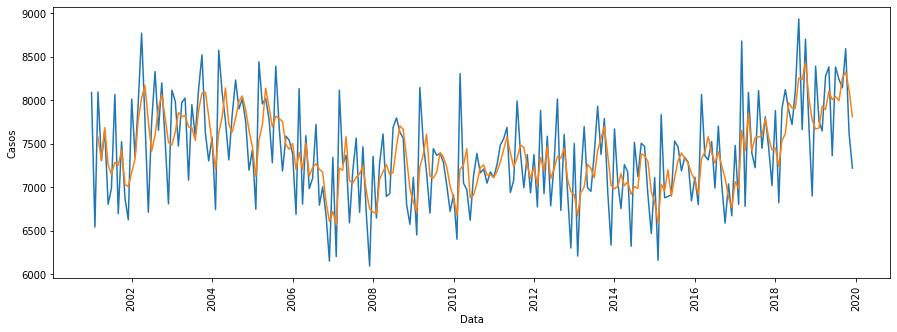

In [21]:
# Plotando a média móvel
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal)
sns.lineplot(x='Data', y='Media_Movel_3', data=dados_serie_temporal)
plt.xticks(rotation=90)
plt.show()

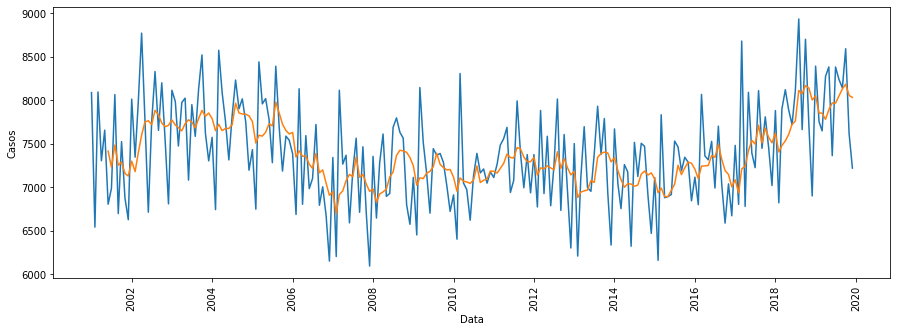

In [22]:
# Plotando a média móvel rolling 6
dados_serie_temporal['Media_Movel_6'] = dados_serie_temporal['Casos'].rolling(6).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal)
sns.lineplot(x='Data', y='Media_Movel_6', data=dados_serie_temporal)
plt.xticks(rotation=90)
plt.show()

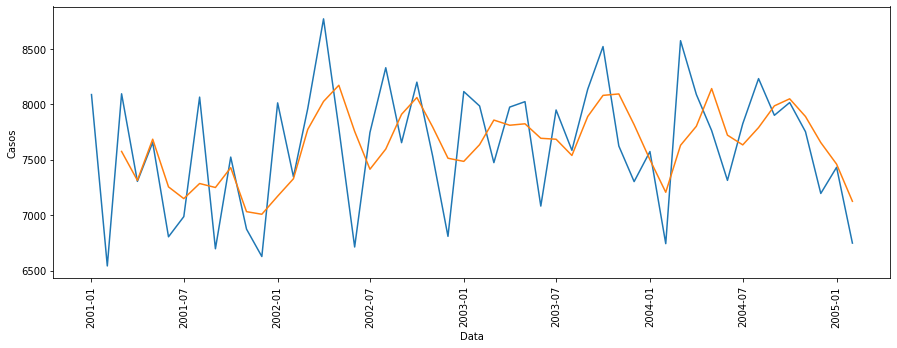

In [23]:
# Plotando a média móvel dos 50 primeiros
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[:50]) # Parece que sempre a média movel está atrassada um mês
sns.lineplot(x='Data', y='Media_Movel_3', data=dados_serie_temporal[:50])
plt.xticks(rotation=90)
plt.show()

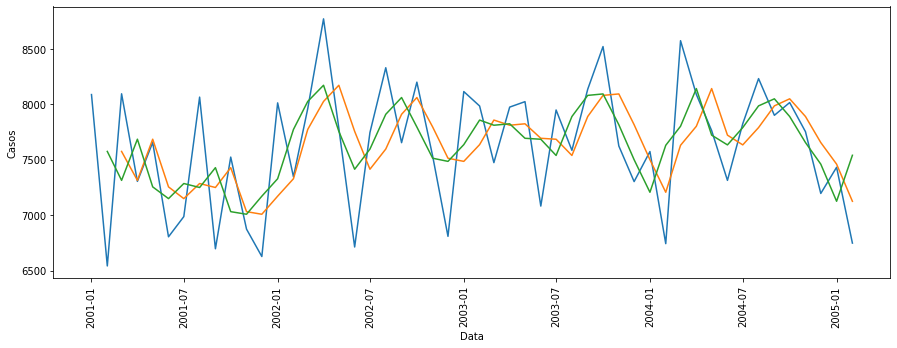

In [24]:
# Plotando a média móvel central
dados_serie_temporal['Media_Movel_3c'] = dados_serie_temporal['Casos'].rolling(3, center=True).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[:50]) # Parece que sempre a média movel está atrassada um mês
sns.lineplot(x='Data', y='Media_Movel_3', data=dados_serie_temporal[:50])
sns.lineplot(x='Data', y='Media_Movel_3c', data=dados_serie_temporal[:50])
plt.xticks(rotation=90)
plt.show()

# **Descomposição e autocorrelação**

## **Encontrando padrões**

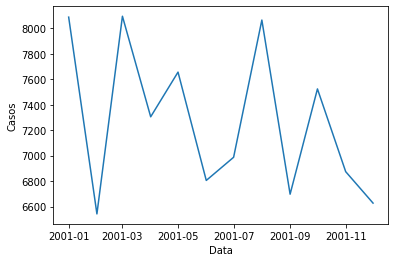

In [25]:
#Olhando os dados de 2001
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[:12])

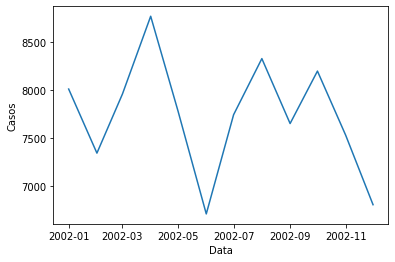

In [26]:
# Olhando os dados de 2002
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[12:24])

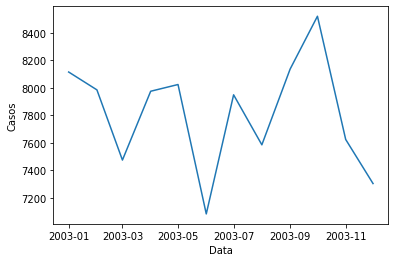

In [27]:
# Olhando os dados de 2003
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[24:36])

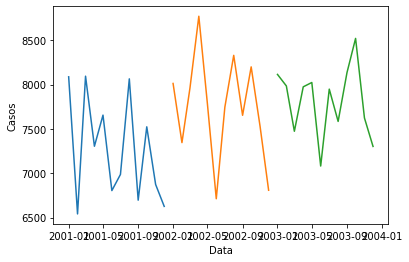

In [28]:
# Comparando os tres gráficos
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[:12])
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[12:24])
sns.lineplot(x='Data', y='Casos', data=dados_serie_temporal[24:36])

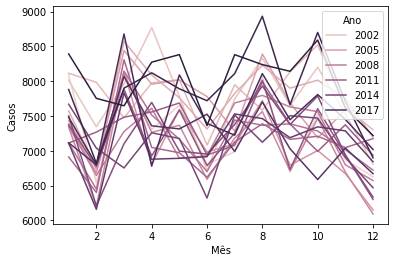

In [29]:
# Criando a coluna ano e mes para plotar todos os anos e ver se existe algum padrão
dados_serie_temporal['Mês'] = dados_serie_temporal['Data'].dt.month
dados_serie_temporal['Ano'] = dados_serie_temporal['Data'].dt.year

sns.lineplot(x='Mês', y='Casos', data=dados_serie_temporal, hue='Ano')

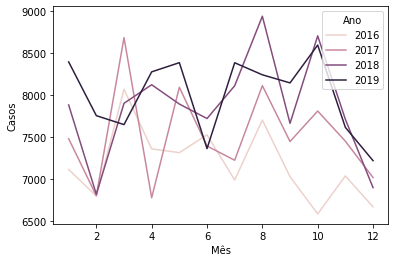

In [30]:
# Olhando o gráfico usando o parametro query para 2019, 2018, 2017, 2016
sns.lineplot(x='Mês', y='Casos', data=dados_serie_temporal.query("Ano in [2019, 2018, 2017, 2016]"), hue='Ano')

In [31]:
# importando bibliioteca stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
# Fazendo a descomposição
decomposicao = seasonal_decompose(dados_serie_temporal[['Data', 'Casos']].set_index('Data'))
decomposicao

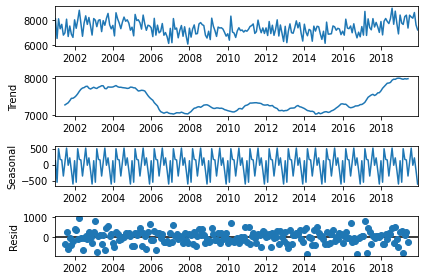

In [33]:
# Plotando modelo aditivo
decomposicao.plot();

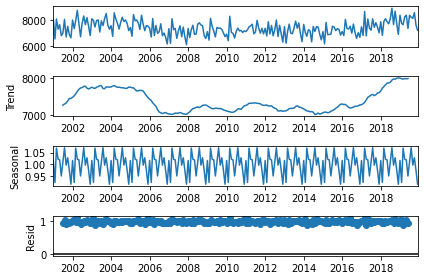

In [34]:
# Plotando modelo multiplicativo
decomposicao = seasonal_decompose(dados_serie_temporal[['Data', 'Casos']].set_index('Data'), model='multiplicative')
decomposicao.plot();

## **Decomposição de series temporais**

In [35]:
url_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'
dados_passageiros = pd.read_csv(url_passageiros)
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
dados_passageiros.dtypes

Month          object
#Passengers     int64
dtype: object

In [37]:
dados_passageiros['Month'] = pd.to_datetime(dados_passageiros['Month'])
dados_passageiros.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

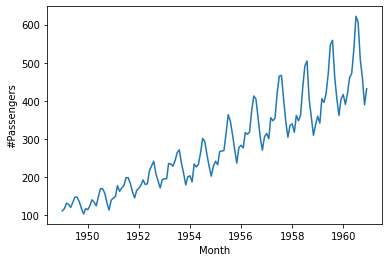

In [38]:
sns.lineplot(x='Month', y='#Passengers', data=dados_passageiros)

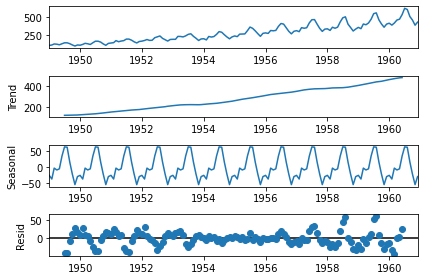

In [39]:
# Olhando a decomposicao da base com modelo 
decomposicao_passageiros = seasonal_decompose(dados_passageiros.set_index('Month'))
decomposicao_passageiros.plot();

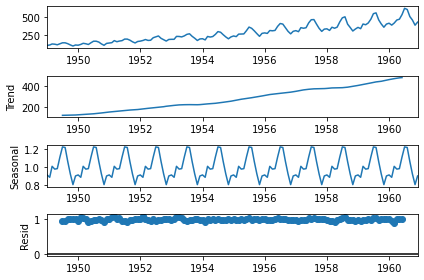

In [40]:
# Modelo multiplicativo
decomposicao_passageiros = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')
decomposicao_passageiros.plot();

## **Autocorrelação e Autocorrelação Parcial**

In [41]:
# Importando a biblioteca de gaficos
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

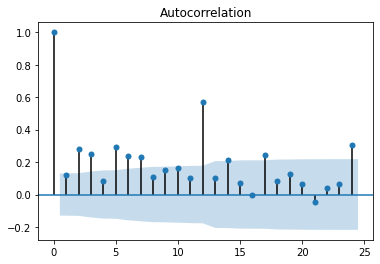

In [42]:
# calculando a autocorrelação
plot_acf(dados_serie_temporal['Casos']);

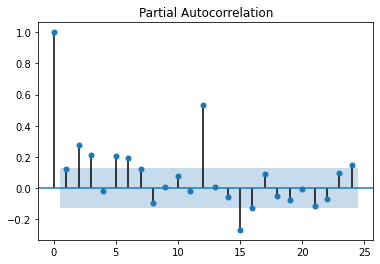

In [43]:
# calculando a autocorrelação parcial
plot_pacf(dados_serie_temporal['Casos']);

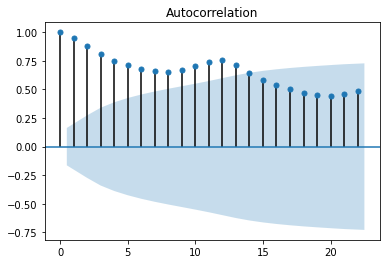

In [44]:
# calculando a autocorrelação dos dados passageiros
plot_acf(dados_passageiros['#Passengers']);

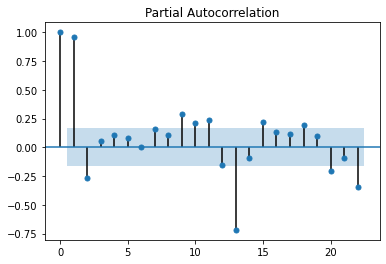

In [45]:
# calculando a autocorrelação parcial dos dados passageiros
plot_pacf(dados_passageiros['#Passengers']);

# **Previsões em séries temporais**

## **Reforçando conceitos**

In [46]:
# Olhando para o dataframe de passageiros
dados_passageiros

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [47]:
# Renomeando os nomes das colunas
dados_passageiros.rename({
    'Month': 'Data', 
    '#Passengers': 'Passageiros'
}, axis=1, inplace=True)

dados_passageiros

,Data,Passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [48]:
# Criando as colunas de ano e mÊs
dados_passageiros['Mês'] = dados_passageiros['Data'].dt.month
dados_passageiros['Ano'] = dados_passageiros['Data'].dt.year
dados_passageiros

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


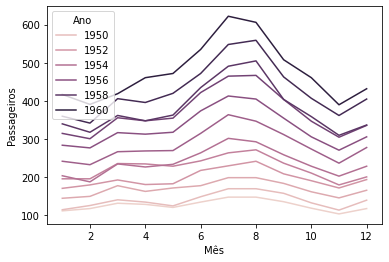

In [49]:
# Criando o gráfico de linha para ver se existe alguma sazonalidade
sns.lineplot(x='Mês', y='Passageiros', data=dados_passageiros, hue='Ano')

In [50]:
# Olhando para a decomposicao 
decomposicao_passageiros.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

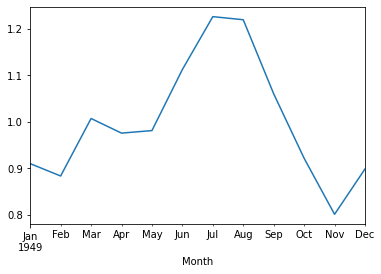

In [51]:
# Olhando para a decomposicao dos primeiros 12 meses
decomposicao_passageiros.seasonal[:12].plot()

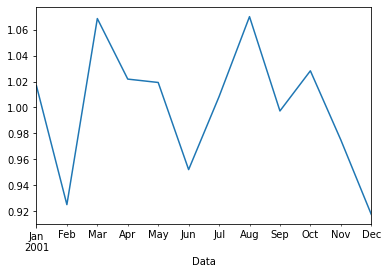

In [52]:
# Agora olhando para a decomposicao dos casos de tuberculoses
decomposicao.seasonal[:12].plot()

## **Previsões com ARIMA**

In [53]:
# importando statsmodel.Arima e fazendo as previsões

from statsmodels.tsa.arima_model import ARIMA

modelo_arima = ARIMA(dados_serie_temporal['Casos'].values.astype('float32'), order=[0,0,0]) # Usado o astype para converter os valores de casos em float
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [54]:
modelo_arima_treinado.forecast(12)[0] # Usando o parametro de forecast para doze meses, fazendo a previsão.

array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772])

In [55]:
# Criando novos dataframes para trabalhar com dados treinados e dados testes

dados_treino = dados_serie_temporal.query("Ano != 2019")
dados_testes = dados_serie_temporal.query("Ano == 2019")

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[12,1,2]) # Aqui estou usando só aqueles que são distinto a 2019
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

In [56]:
previsao = modelo_arima_treinado.forecast(12)[0] # Usando o parametro de forecast para doze meses, fazendo a previsão.
previsao

array([8216.6424095 , 7149.9942677 , 7970.01965973, 8163.98839685,
       7785.68661948, 7891.92112849, 7928.50841687, 8471.04779394,
       7865.80145295, 8383.95028473, 7831.00507078, 7269.16645958])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


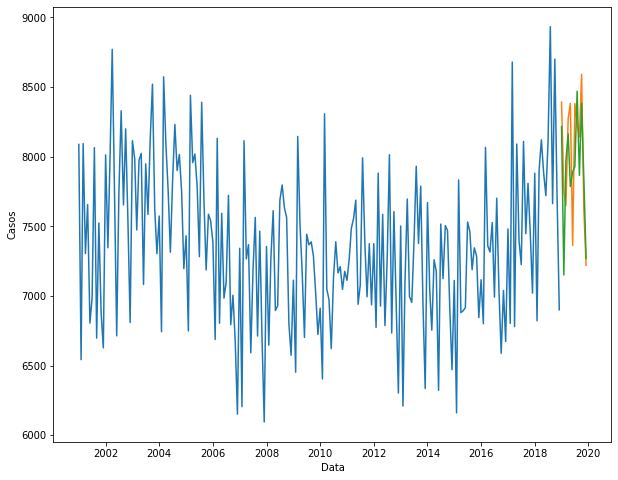

In [57]:
# Plotando o gráfico para ver as previsões
dados_testes['previsao'] = previsao
plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_testes)
sns.lineplot(x='Data', y='previsao', data=dados_testes)

## **Ajustes de parâmetros**

Ler documentação https://la.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html

In [58]:
# Usando os dados de passageiros para ver a diferença de previsão com ARIMA

dados_treino_passageiros = dados_passageiros.query("Ano != 1960")
dados_testes_passageiros = dados_passageiros.query("Ano == 1960")

modelo_arima = ARIMA(dados_treino_passageiros['Passageiros'].values.astype('float32'), order=[2,1,2]) # Aqui estou usando só aqueles que são distinto a 2019
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


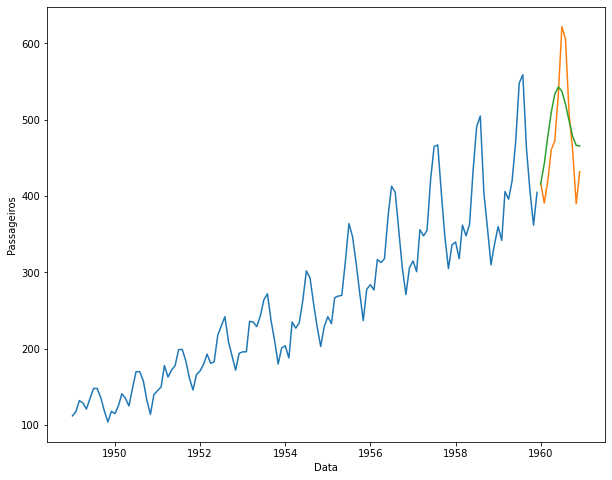

In [59]:
dados_testes_passageiros['previsao'] = previsao
plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Passageiros', data=dados_treino_passageiros)
sns.lineplot(x='Data', y='Passageiros', data=dados_testes_passageiros)
sns.lineplot(x='Data', y='previsao', data=dados_testes_passageiros)

#**AUTOARIMA e Prophet**

## **Métricas de avaliação e AUTOARIMA**

In [60]:
# Instalando pmdarima
!pip install pmdarima

In [61]:
# Importando auto_arima
from pmdarima.arima import auto_arima

In [62]:
# variavel modelo autoarima e treinando com dados_treinos 
modelo_autoarima = auto_arima(dados_treino['Casos'].values, error_action='ignore', trace=True, seasonal=True, m = 12) # Para que não gere um erro por conta da order colocar o parametro de error_Action

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.85 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=4.93 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.12 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.28 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.87 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

In [63]:
# Fazendo a previsão dos ultimos doze meses
previsao_autoarima = modelo_autoarima.predict(12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


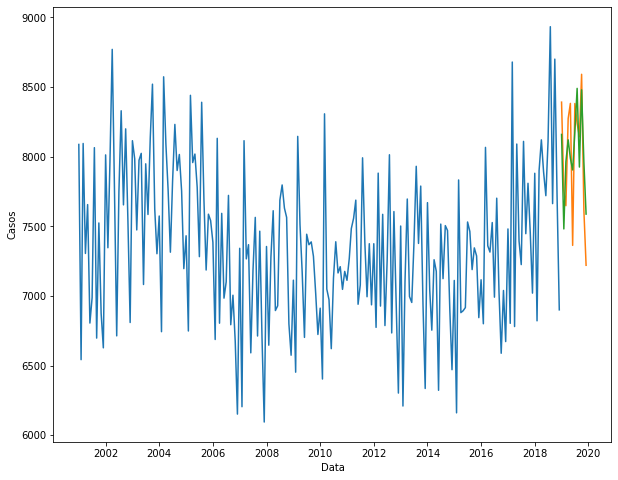

In [64]:
# Plotando o gráfico com a previsão
dados_testes['previsao_autoarima'] = previsao_autoarima
plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_testes)
sns.lineplot(x='Data', y='previsao_autoarima', data=dados_testes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


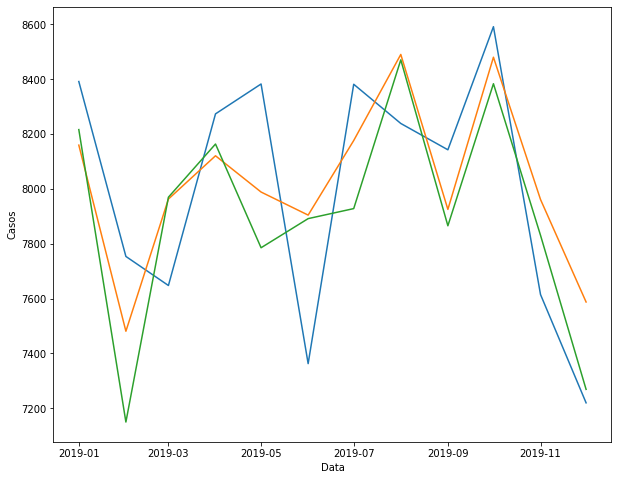

In [65]:
# Plotando o gráfico sem 
dados_testes['previsao_autoarima'] = previsao_autoarima
plt.figure(figsize=(10,8))
#sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_testes)
sns.lineplot(x='Data', y='previsao_autoarima', data=dados_testes)
sns.lineplot(x='Data', y='previsao', data=dados_testes)

In [66]:
# Usando métricas para analisar qual modelo foi melhor

from sklearn.metrics import mean_squared_error

resultado_autoarima = mean_squared_error(dados_testes['Casos'], dados_testes['previsao_autoarima'])
resultado_arima = mean_squared_error(dados_testes['Casos'], dados_testes['previsao'])

print(f'Autoarima = {resultado_autoarima}')
print(f'Arima = {resultado_arima}')

Autoarima = 93378.93285752926
Arima = 131384.4418748081


## **Prophet**

In [67]:
# Importando prophet e fazendo a previsão com o modelo

from fbprophet import Prophet

modelo_prophet = Prophet(seasonality_mode='multiplicative')
dados_passageiros_prophet = dados_passageiros[['Data', 'Passageiros']].rename({'Data': 'ds', 'Passageiros': 'y'}, axis=1) # Nesse caso o modelo pede para passar as informações das colunas 'ds' e 'y'. Renomear o nome das colunas.
modelo_prophet_treinado = modelo_prophet.fit(dados_passageiros_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
# Criando a variavel do futuro para ver a previsao

futuro = modelo_prophet_treinado.make_future_dataframe(periods=12, freq='M')
futuro

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31


In [69]:
# Plotando o resultado do modelo prophet com predict do futuro (variavel)
resultado_prophet = modelo_prophet_treinado.predict(futuro)
resultado_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,114.164382,89.761517,116.249429,114.164382,114.164382,-0.089502,-0.089502,-0.089502,-0.089502,-0.089502,-0.089502,0.0,0.0,0.0,103.946447
1,1949-02-01,115.875199,87.239153,112.768785,115.875199,115.875199,-0.133199,-0.133199,-0.133199,-0.133199,-0.133199,-0.133199,0.0,0.0,0.0,100.440753
2,1949-03-01,117.420452,101.699186,128.318020,117.420452,117.420452,-0.021447,-0.021447,-0.021447,-0.021447,-0.021447,-0.021447,0.0,0.0,0.0,114.902108
3,1949-04-01,119.131269,104.245463,129.889214,119.131269,119.131269,-0.022020,-0.022020,-0.022020,-0.022020,-0.022020,-0.022020,0.0,0.0,0.0,116.507990
4,1949-05-01,120.786897,106.025748,132.933051,120.786897,120.786897,-0.011683,-0.011683,-0.011683,-0.011683,-0.011683,-0.011683,0.0,0.0,0.0,119.375795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1961-07-31,520.742003,653.870958,679.132326,519.805610,521.925517,0.280543,0.280543,0.280543,0.280543,0.280543,0.280543,0.0,0.0,0.0,666.832682
152,1961-08-31,524.351563,546.460289,573.360660,523.169302,525.756153,0.068318,0.068318,0.068318,0.068318,0.068318,0.068318,0.0,0.0,0.0,560.173962
153,1961-09-30,527.844685,464.830593,490.877749,526.417180,529.543856,-0.094184,-0.094184,-0.094184,-0.094184,-0.094184,-0.094184,0.0,0.0,0.0,478.129906
154,1961-10-31,531.454245,408.546155,434.784079,529.730494,533.498062,-0.206471,-0.206471,-0.206471,-0.206471,-0.206471,-0.206471,0.0,0.0,0.0,421.724499


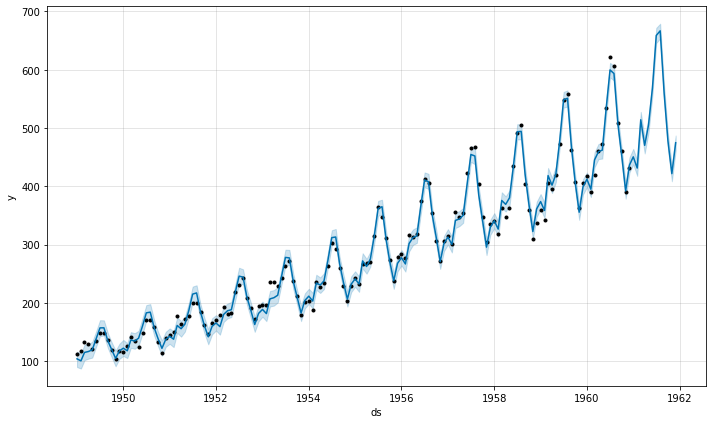

In [70]:
# Plotando o gráfico do resultado prophet
modelo_prophet_treinado.plot(resultado_prophet);